# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
import json


In [6]:
# Fetch current BTC price
requests.get(btc_url)
btc_api = requests.get(btc_url)
btc_data = btc_api.json()
current_btc_value = btc_data['data']['1']['quotes']['USD']['price']

current_btc_value

36491.0

In [7]:
# Fetch current ETH price
requests.get(eth_url)
eth_api = requests.get(eth_url)
eth_data = eth_api.json()
current_eth_price = eth_data["data"]['1027']['quotes']['USD']['price']

#Compute current value of my crpto

my_eth_value = current_eth_price * my_eth 
my_btc_value = current_btc_value * my_btc

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43789.20
The current value of your 5.3 ETH is $14575.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('api_key')
api_secret_key = os.getenv('secret_alpaca_trade_api')

alpaca_key


'PK5HRQOCZZIZT62ENNUX'

In [10]:
# Create the Alpaca API object
alpaca_key = tradeapi.REST(
    alpaca_key,
    api_secret_key,
    api_version='v2')

In [11]:
# Format current date as ISO format

today = pd.Timestamp("2022-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_tickers = alpaca_key.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_tickers = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

df_tickers


AGG                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-05-02 04:00:00+00:00  102.35  102.36  102.000  102.13  12701609   
2022-05-03 04:00:00+00:00  102.71  102.79  102.290  102.36  12148512   
2022-05-04 04:00:00+00:00  102.32  103.05  102.120  103.02  14342690   
2022-05-05 04:00:00+00:00  102.37  102.52  101.585  102.00  17492009   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-05-02 04:00:00+00:00       39900  102.151602  412.01  415.92  405.0200   
2022-05-03 04:00:00+00:00       46402  102.520626  414.91  418.93  413.3600   
2022-05-04 04:00:00+00:00       52717  102.525746  417.13  429.66  413.7099   
2022-05-05 04:00:00+00:00       43730  101.866928  424.58  425.00  409.4400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-05-02 04:00:00+00:00  414.48  157684938     1459109  411.158285  
2022-05-03 04:00:00+00:00  416.38   99739343      849671  416.097976  
2022-05-04 04:00:00+00:00  429.06  143203740     1455621  421.265866  
2022-05-05 04:00:00+00:00  413.81  172192959     1578716  415.441556

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_tickers['AGG']['close']
spy_close_price = df_tickers['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2022-05-02 04:00:00+00:00    102.13
2022-05-03 04:00:00+00:00    102.36
2022-05-04 04:00:00+00:00    103.02
2022-05-05 04:00:00+00:00    102.00
Name: close, dtype: float64
Current SPY closing price: $timestamp
2022-05-02 04:00:00+00:00    414.48
2022-05-03 04:00:00+00:00    416.38
2022-05-04 04:00:00+00:00    429.06
2022-05-05 04:00:00+00:00    413.81
Name: close, dtype: float64


In [13]:
# Compute the current value of shares
my_spy_value = spy_close_price[2] * my_spy
my_agg_value = agg_close_price[2] * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21453.00
The current value of your 200 AGG shares is $20604.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame([crypto, shares])

df_savings.rename(index={0:'crypto', 1:'shares'}, columns={0:'amount'}, inplace=True)

# Display savings DataFrame
display(df_savings)



,amount
crypto,58364.465
shares,42057.000


<AxesSubplot:ylabel='amount'>

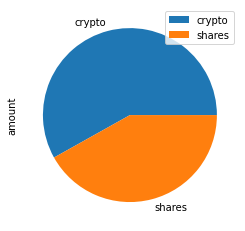

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
# Validate saving health
total_savings

100421.465

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-05', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

timeframe = "1D"

tickers = ["SPY","AGG"]

df_stock_data = alpaca_key.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.tail()

AGG                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-04-29 04:00:00+00:00  102.92  103.27  102.820  102.87   9922012   
2022-05-02 04:00:00+00:00  102.35  102.36  102.000  102.13  12701609   
2022-05-03 04:00:00+00:00  102.71  102.79  102.290  102.36  12148512   
2022-05-04 04:00:00+00:00  102.32  103.05  102.120  103.02  14342690   
2022-05-05 04:00:00+00:00  102.37  102.52  101.585  102.00  17492009   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-04-29 04:00:00+00:00       33928  103.003420  423.56  425.87  411.2100   
2022-05-02 04:00:00+00:00       39900  102.151602  412.01  415.92  405.0200   
2022-05-03 04:00:00+00:00       46402  102.520626  414.91  418.93  413.3600   
2022-05-04 04:00:00+00:00       52717  102.525746  417.13  429.66  413.7099   
2022-05-05 04:00:00+00:00       43730  101.866928  424.58  425.00  409.4400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-29 04:00:00+00:00  412.00  145242451     1143618  416.879474  
2022-05-02 04:00:00+00:00  414.48  157684938     1459109  411.158285  
2022-05-03 04:00:00+00:00  416.38   99739343      849671  416.097976  
2022-05-04 04:00:00+00:00  429.06  143203740     1455621  421.265866  
2022-05-05 04:00:00+00:00  413.81  172192959     1578716  415.441556

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [23]:
# Printing the simulation input data
mc_five_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-05-05 04:00:00+00:00  108.72  108.74  108.5700  108.70  1421843   
2017-05-08 04:00:00+00:00  108.63  108.67  108.4900  108.49  3568402   
2017-05-09 04:00:00+00:00  108.43  108.51  108.4000  108.50  3084948   
2017-05-10 04:00:00+00:00  108.60  108.66  108.4400  108.53  1653429   
2017-05-11 04:00:00+00:00  108.35  108.54  108.3435  108.52  2331142   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-05-05 04:00:00+00:00        7385  108.675918          NaN  239.16   
2017-05-08 04:00:00+00:00       12680  108.528034    -0.001932  239.77   
2017-05-09 04:00:00+00:00        7734  108.463623     0.000092  239.94   
2017-05-10 04:00:00+00:00        8667  108.524494     0.000276  239.37   
2017-05-11 04:00:00+00:00        9679  108.486079    -0.000092  239.31   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-05-05 04:00:00+00:00  239.72  238.68  239.70  62001269      204885   
2017-05-08 04:00:00+00:00  239.92  239.17  239.66  48385730      153802   
2017-05-09 04:00:00+00:00  240.19  239.04  239.44  51363200      190509   
2017-05-10 04:00:00+00:00  239.87  239.15  239.87  54293799      152415   
2017-05-11 04:00:00+00:00  239.57  238.13  239.38  62269354      211029   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-05-05 04:00:00+00:00  239.253410          NaN  
2017-05-08 04:00:00+00:00  239.572890    -0.000167  
2017-05-09 04:00:00+00:00  239.683266    -0.000918  
2017-05-10 04:00:00+00:00  239.618396     0.001796  
2017-05-11 04:00:00+00:00  239.088106    -0.002043

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 110.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 120.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 130.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 140.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 150.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 160.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 170.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 180.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 190.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 200.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 210.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 220.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 230.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 240.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 250.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 260.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 270.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 280.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 290.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 300.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 310.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 320.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 330.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 340.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 350.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 360.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 370.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 380.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 390.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 400.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 410.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 420.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 430.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 440.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 450.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 460.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 470.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 480.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

Running Monte Carlo simulation number 490.


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:117: PerformanceWarning: 

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001381,0.999757,1.005639,0.999495,0.989649,1.003916,1.001266,0.999948,0.989524,1.001544,...,0.998459,1.002949,1.003278,1.000678,0.991638,1.006152,0.990024,0.994065,1.001370,1.006260
2,1.004855,0.996974,1.018134,0.988778,0.989315,1.005252,1.000587,0.998026,0.984688,1.001322,...,0.996717,1.004170,1.009193,1.000521,0.981339,1.003083,0.993031,0.998012,0.998817,1.011826
3,1.008277,0.989192,1.014694,0.983240,0.993642,1.004753,1.003708,0.989767,0.996777,0.995889,...,0.990063,1.003968,1.013021,0.999359,0.975822,1.000653,0.997289,0.995605,1.004972,1.020031
4,1.001494,0.995610,1.020107,0.974737,0.993598,1.001555,0.995495,0.993579,0.994527,0.994172,...,0.992771,1.004281,1.009104,0.990682,0.981536,1.006625,0.991207,0.989031,1.004409,1.031232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.053431,1.468483,1.262802,1.229166,0.968555,1.746714,1.522485,1.361351,1.600389,1.110333,...,1.322549,1.110077,1.189666,1.465121,1.144892,1.505687,1.679270,1.412722,1.045397,1.316541
1257,1.057043,1.461943,1.244592,1.230974,0.963657,1.746636,1.522308,1.357738,1.602119,1.118229,...,1.314971,1.114180,1.188769,1.457745,1.150523,1.524420,1.677915,1.410662,1.045744,1.326691
1258,1.055411,1.463006,1.259421,1.241710,0.958068,1.765620,1.518893,1.371003,1.609069,1.121057,...,1.311466,1.120640,1.184259,1.455884,1.148139,1.513650,1.663084,1.405632,1.047092,1.325010
1259,1.058360,1.479781,1.257913,1.235573,0.957542,1.763339,1.520159,1.365176,1.603614,1.117850,...,1.318029,1.120003,1.189023,1.453724,1.144613,1.519828,1.679049,1.416263,1.044547,1.327638


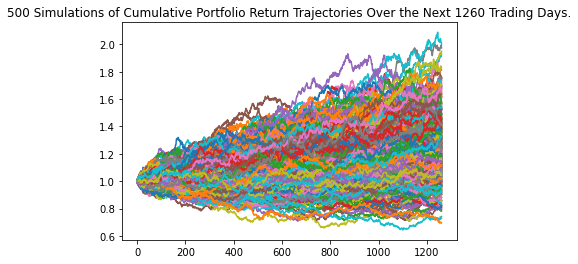

In [25]:
# Plot simulation outcomes
line_plot = mc_five_year.plot_simulation()

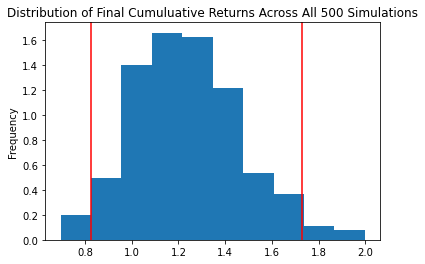

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = mc_five_year.plot_distribution()


### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mc_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.236450
std               0.230248
min               0.694530
25%               1.073138
50%               1.221846
75%               1.381762
max               1.998621
95% CI Lower      0.824160
95% CI Upper      1.729302
Name: 1260, dtype: float64


/Users/domenicrhedrick/Desktop/Financial Presentation/Financial_Planner/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16483.19 and $34586.05


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24724.79 and $51879.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")